In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [76]:
dataset= pd.read_csv('data.csv')

In [77]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


<AxesSubplot:>

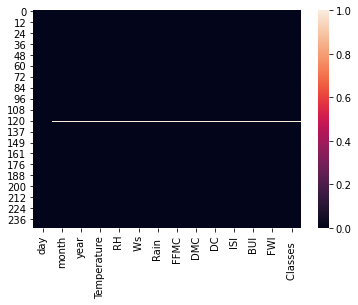

In [88]:
sns.heatmap(dataset.isnull())

In [89]:
dataset.drop([123,124,125,126,127,171,170,172], axis=0 ,inplace=True)

KeyError: '[123 124 125 126 127 171 170 172] not found in axis'

In [90]:
dataset.values[171]

array(['26', '07', '2012', '35', '58', '10', '0.2', '78.3', '10.8',
       '19.7', '1.6', '10.7', '1', 'not fire   '], dtype=object)

In [91]:
y=dataset['Classes  ']

In [92]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [93]:
X = dataset.drop(['day', 'month', 'year','Classes  '],axis=1)

In [94]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


<AxesSubplot:>

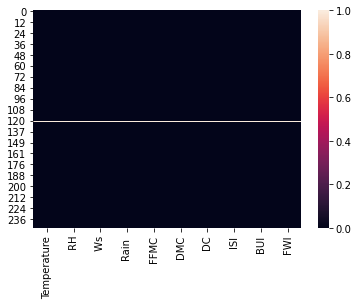

In [95]:
sns.heatmap(X.isnull())

In [86]:
X.values[125]

array(['35', '44', '17', '0.2', '85.6', '9.9', '28.9', '5.4', '10.7', '6'],
      dtype=object)

In [87]:
sns.heatmap(y.isnull())

IndexError: Inconsistent shape between the condition and the input (got (238, 1) and (238,))

In [62]:
y_cat=pd.get_dummies(y)

In [66]:
Y=[]
for i in y.values:
    if 'not fire' in str(i):
        Y.append(0)
    if 'fire' in str(i):
        Y.append(1)    
        

In [69]:
y_final=np.array(Y)

In [71]:
y_final.shape

(338,)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
mind = LogisticRegression()

In [74]:
mind.fit(X,y_final)

ValueError: could not convert string to float: '14.6 9'

In [75]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7
